#### CSE 6363: Machine Learning
#### University of Texas at Arlington Summer 2022
#### Name :- Pankaj Gope
#### Proferrsor :- Alex Dillhoff
#### Assignment 1

#### Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import datasets
import time
import warnings
warnings.filterwarnings('ignore')

#### The Iris Dataset

In [2]:
irisinfo = datasets.load_iris()
feature, target = irisinfo.data,irisinfo.target
print(feature.shape)
print(irisinfo.target_names)
print(irisinfo.feature_names)

featurenames = irisinfo.feature_names

feature_traininfo, feature_testinfo, target_traininfo, target_testinfo = train_test_split(feature,target,test_size=0.1,random_state=86);

comb = list(combinations(list(range(4)),2))
print(comb)

#print(feature_testinfo)

#print(target_testinfo)

#print(feature_traininfo)

#print(target_traininfo)

(150, 4)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


#### Data Visualization 

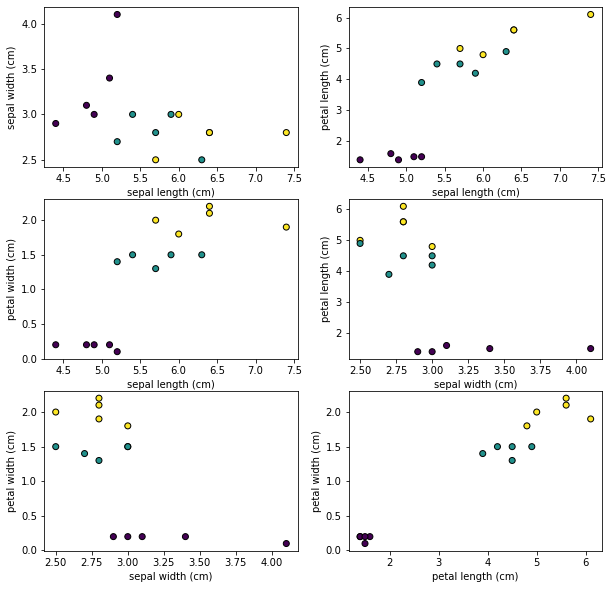

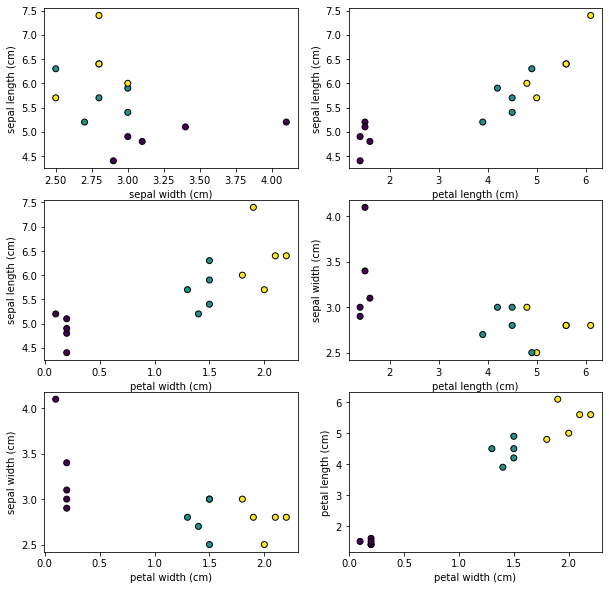

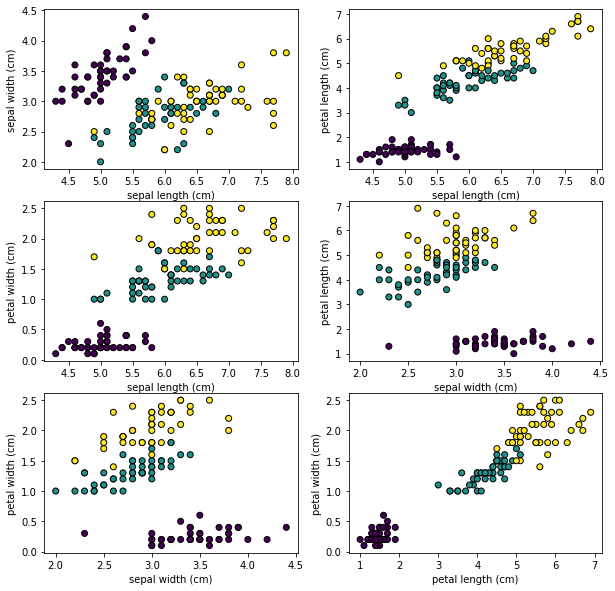

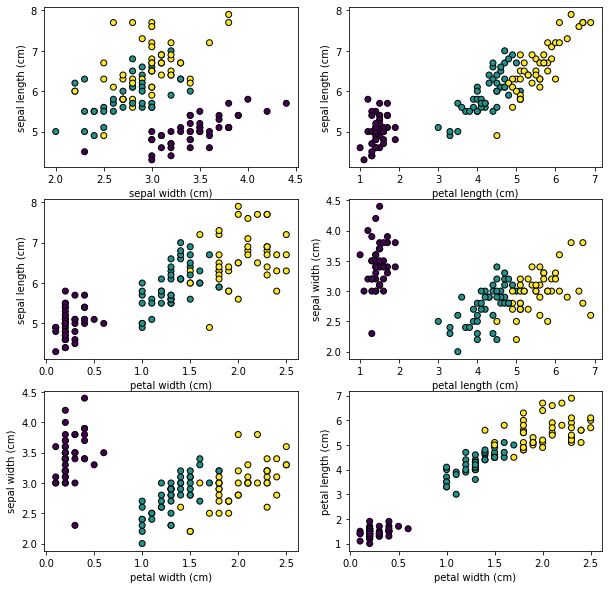

In [3]:
figure1 = plt.figure(figsize = [10,10])
for i, v in enumerate(comb):
    testdata = figure1.add_subplot(3,2,i+1)
    testdata.scatter(feature_testinfo[:, v[0]], feature_testinfo[:, v[1]], c=target_testinfo, edgecolor='k')
    testdata.set_xlabel(featurenames[v[0]])
    testdata.set_ylabel(featurenames[v[1]])
    
figure2 = plt.figure(figsize = [10,10])
for i, v in enumerate(comb):
    testdata = figure2.add_subplot(3,2,i+1)
    testdata.scatter(feature_testinfo[:, v[1]], feature_testinfo[:, v[0]], c=target_testinfo, edgecolor='k')
    testdata.set_xlabel(featurenames[v[1]])
    testdata.set_ylabel(featurenames[v[0]])
    
figure3 = plt.figure(figsize = [10,10])
for i, v in enumerate(comb):
    traindata = figure3.add_subplot(3,2,i+1)
    traindata.scatter(feature_traininfo[:, v[0]], feature_traininfo[:, v[1]], c=target_traininfo, edgecolor='k')
    traindata.set_xlabel(featurenames[v[0]])
    traindata.set_ylabel(featurenames[v[1]])

figure3 = plt.figure(figsize = [10,10])
for i, v in enumerate(comb):
    traindata = figure3.add_subplot(3,2,i+1)
    traindata.scatter(feature_traininfo[:, v[1]], feature_traininfo[:, v[0]], c=target_traininfo, edgecolor='k')
    traindata.set_xlabel(featurenames[v[1]])
    traindata.set_ylabel(featurenames[v[0]])
    


    

#### Loading the Dataset 

In [4]:
irisdata = datasets.load_iris()
feature, target = irisdata.data ,irisdata.target
feature_traindata, feature_testdata, target_traindata, target_testdata = train_test_split(feature,target,
                                                                                          test_size=0.1,
                                                                                          random_state=86);

#### Model Defination

In [5]:
def develop_model(i, j, regularization_constant=0, need_graph=True):
    feature_train = feature_traindata[:, i]
    target_train = feature_traindata[:, j]
    feature_test = feature_testdata[:, i]
    target_test = feature_testdata[:, j]
    rg = LR_with_Regularization(regularization_constant=regularization_constant)
    rg.model_training(feature_train, target_train)
    predicted_arratarget = rg.predict(feature_test)
    if need_graph:
        plt.plot(range(rg.iter_MAX), rg.Loss_model)
        plt.title("Loss vs Steps")
        plt.xlabel("Steps")
        plt.ylabel("Loss")
        plt.show()
    mean_sq_err = mean_squared_error(target_test, predicted_arratarget)
    return rg, mean_sq_err

def develop_model_logistic(ft, learning_rate=0.2, need_graph=True):
    feature_train = feature_traindata[:, ft]
    target_train = target_traindata
    feature_test = feature_testdata[:, ft]
    target_test = target_testdata
    rg = Logisticwith_regularization(learning_rate=learning_rate)
    rg.model_training(feature_train, target_train)
    predicted_arratarget = rg.predict(feature_test)
    if need_graph:
        plt.plot(range(rg.iter_MAX), rg.Loss_model)
        plt.title("Loss vs Steps for learning_rate = " + str(learning_rate))
        plt.xlabel("Steps")
        plt.ylabel("Loss")
        plt.show()
    mean_sq_err = mean_squared_error(target_test, predicted_arratarget)
    return rg, mean_sq_err

def finalize(feature, combs):
    attributes = ['sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)', 'petal width (cm)']
    combs = list(combinations(list(range(4)),2))
    info = [[0 for i in range(3)] for j in range(12)]
    for k in range(len(combs)):
        comb = combs[k]
        i, j = comb[0], comb[1]
        print("\nFeature:", attributes[i], "Target:", attributes[j])
        rg, mean_sq_err = develop_model(i, j)
        info[2*k][2] = mean_sq_err
        info[2*k][0] = attributes[i]
        info[2*k][1] = attributes[j]
        if k==0:
            rg1, _ = develop_model(i, j, regularization_constant=1, need_graph=False)
            idx_max, jdx_max = i, j
            weights_0_new, weights_1_new = rg.w
            weights_0_right, weights_1_right = rg1.w 
        print("\nFeatures:", attributes[j], "Target:", attributes[i])
        rg, mean_sq_err = develop_model(j, i)
        info[2*k+1][2] = mean_sq_err
        info[2*k+1][0] = attributes[i]
        info[2*k+1][1] = attributes[j]
    return info, weights_0_new, weights_1_new, weights_0_right, weights_1_right, idx_max, jdx_max

class LR_with_Regularization:
      
    def __init__(self, regularization_constant=1e-1, iter_MAX=100, learning_rate=0.01, bundles=32):
        self.regularization_constant = regularization_constant 
        self.learning_rate = learning_rate        
        self.iter_MAX = iter_MAX
        self.bundles = bundles

    def model_training(self, feature, target):
        self.w = np.array([0, 0]) # [w0, w1]
        self.feature = feature
        self.target = target
        self.Loss_model = []
        for iterations in range(self.iter_MAX):
            Loss_model, count = 0, 0
            for i in range(0, len(feature), self.bundles):
                bundle_feature_array_target = feature[i:i+self.bundles]
                target_batch = target[i:i+self.bundles]
                self.rectify_parameters(bundle_feature_array_target, target_batch)
                predicted_arratarget = self.predict(bundle_feature_array_target)
                Loss_model += 0.5 * np.sum(target_batch - predicted_arratarget)**2 + 0.5 * self.regularization_constant * (self.w[1]**2)
                count += 1
            self.Loss_model.append(Loss_model/count) #loss average over the batch size
    
    def rectify_parameters(self, feature, target):
        m = len(feature)
        predicted_arratarget = self.predict(feature)    
        dw1 = (((feature).dot(predicted_arratarget - target)) +               
               (self.regularization_constant * self.w[1])) / m 
        dw0 = np.sum(predicted_arratarget - target) / m
        self.w = np.array([self.w[0] - self.learning_rate * dw0, self.w[1] - self.learning_rate * dw1])
  
    def predict(self, feature):    
        return feature.dot(self.w[1]) + self.w[0]

class Logisticwith_regularization:
      
    def __init__(self, regularization_constant=1e-1, iter_MAX=100, 
                 learning_rate=0.01, bundles=32):
        self.regularization_constant = regularization_constant 
        self.learning_rate = learning_rate        
        self.iter_MAX = iter_MAX
        self.bundles = bundles

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def rectify_parameters(self, feature, target):
        m = len(feature)
        Z = feature[:, 0] * self.w[1] + feature[:, 1] * self.w[2] + self.w[0]
        targetp = self.sigmoid(Z)    
        dw2 = (np.sum((targetp - target) * targetp * (1 - targetp) * feature[:, 1]) + (self.regularization_constant * self.w[2])) / m 
        dw1 = (np.sum((targetp - target) * targetp * (1 - targetp) * feature[:, 0]) + (self.regularization_constant * self.w[1])) / m 
        dw0 = np.sum((targetp - target) * targetp * (1 - targetp)) / m
        self.w = np.array([self.w[0] - self.learning_rate * dw0, 
                           self.w[1] - self.learning_rate * dw1,
                           self.w[2] - self.learning_rate * dw2])

    def model_training(self, feature, target):
        self.W = []
        self.feature = feature
        self.target = target
        self.labels = np.unique(target)
        self.Loss_modelClass = []

        for c in self.labels:
            Loss_models = []
            target_bin = np.where(target == c, 1, 0)
            self.w = np.array([0, 0, 0]) # [w0, w1, w2]
            for iterations in range(self.iter_MAX):
                Loss_model, count = 0, 0
                for i in range(0, len(feature), self.bundles):
                    bundle_feature_array_target = feature[i:i+self.bundles]
                    target_batch = target_bin[i:i+self.bundles]
                    self.rectify_parameters(bundle_feature_array_target, target_batch)
                    Z = bundle_feature_array_target[:, 0] * self.w[1] + bundle_feature_array_target[:, 1] * self.w[2] + self.w[0]
                    targetp = self.sigmoid(Z)
                    Loss_model += 0.5 * np.sum(target_batch - targetp)**2 + 0.5 * self.regularization_constant * (self.w[1]**2 + self.w[2]**2)
                    count += 1
                Loss_models.append(Loss_model/count)
            self.Loss_modelClass.append(Loss_models) #loss average over the batch size
            self.Loss_model = np.mean(self.Loss_modelClass, axis=0)
            self.W.append(self.w)
  
    def predict(self, feature):
        preds = [np.argmax([self.sigmoid(featurei[0] * w[1] + featurei[1] * w[2] + w[0])
                            for w in self.W])
                 for featurei in feature]
        return np.array([self.labels[i] for i in preds])

def finalize_logistic(attributes, combs):
    info = [[0 for i in range(3)] for j in range(6)]
    for k in range(len(combs)):
        comb = combs[k]
        ft = [comb[0], comb[1]]
        print("\nFeature1:", attributes[ft[0]], "Feature2:", attributes[ft[1]])
        rg, mean_sq_err = develop_model_logistic(ft)
        info[k][2] = mean_sq_err
        info[k][0] = attributes[ft[0]]
        info[k][1] = attributes[ft[1]]
    return info

#### Linear Regression

In [6]:
attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
combs = list(combinations(list(range(4)),2))


Feature: sepal length (cm) Target: sepal width (cm)


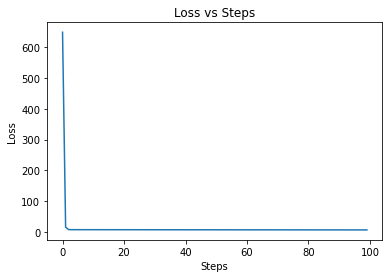


Features: sepal width (cm) Target: sepal length (cm)


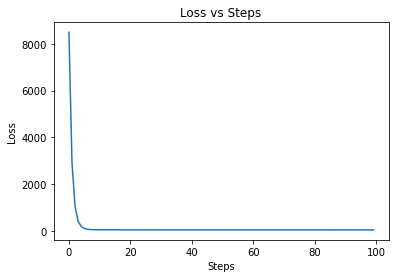


Feature: sepal length (cm) Target: petal length (cm)


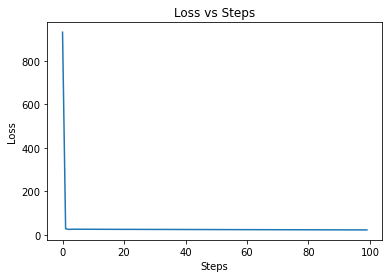


Features: petal length (cm) Target: sepal length (cm)


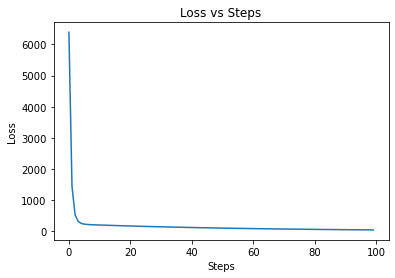


Feature: sepal length (cm) Target: petal width (cm)


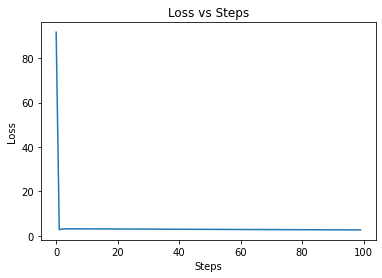


Features: petal width (cm) Target: sepal length (cm)


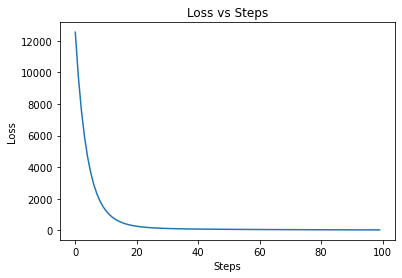


Feature: sepal width (cm) Target: petal length (cm)


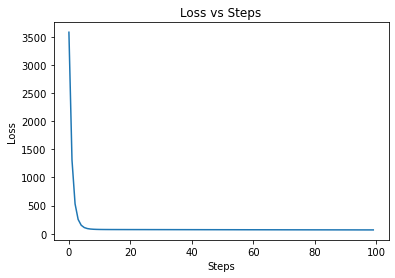


Features: petal length (cm) Target: sepal width (cm)


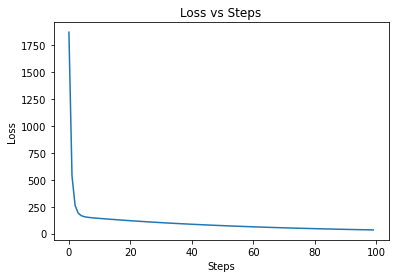


Feature: sepal width (cm) Target: petal width (cm)


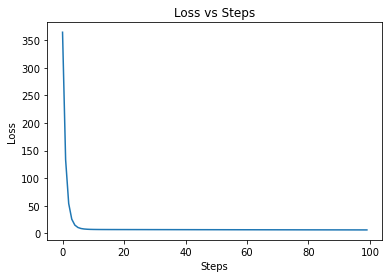


Features: petal width (cm) Target: sepal width (cm)


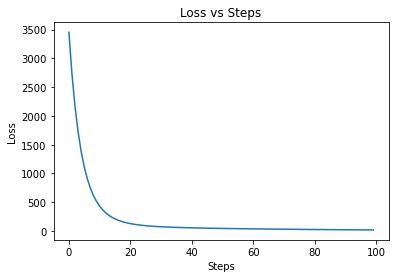


Feature: petal length (cm) Target: petal width (cm)


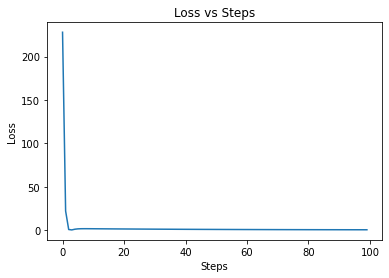


Features: petal width (cm) Target: petal length (cm)


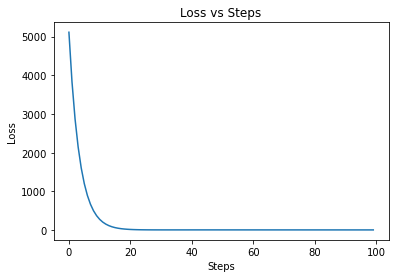


Feature: sepal length (cm) Target: sepal width (cm)

Weight of Non-regularized model: (0.37156821173560206, 0.4611419259143888)

Weight of Regularized model: (0.39116396681614735, 0.45687175468803026)


Feature             Target  Test mean_sq_err
0   sepal length (cm)   sepal width (cm)          0.355922
1   sepal length (cm)   sepal width (cm)          1.217152
2   sepal length (cm)  petal length (cm)          1.558721
3   sepal length (cm)  petal length (cm)          0.610570
4   sepal length (cm)   petal width (cm)          0.392030
5   sepal length (cm)   petal width (cm)          0.569728
6    sepal width (cm)  petal length (cm)          3.727952
7    sepal width (cm)  petal length (cm)          0.468310
8    sepal width (cm)   petal width (cm)          0.702500
9    sepal width (cm)   petal width (cm)          0.375404
10  petal length (cm)   petal width (cm)          0.038410
11  petal length (cm)   petal width (cm)          0.125013

In [7]:
info, weights_0_new, weights_1_new, weights_0_right, weights_1_right, idx_max, jdx_max = finalize(attributes, combs)
print("\nFeature:", attributes[idx_max], "Target:", attributes[jdx_max])
print("\nWeight of Non-regularized model:", (weights_0_new, weights_1_new))
print("\nWeight of Regularized model:", (weights_0_right, weights_1_right))
pd.DataFrame(info, columns=["Feature", "Target", "Test mean_sq_err"])

#### Logistic Regression


Feature1: sepal length (cm) Feature2: sepal width (cm)


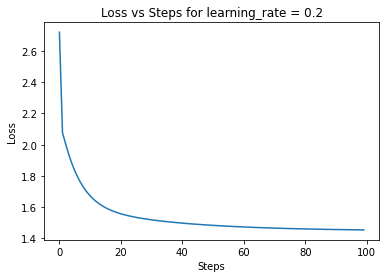


Feature1: sepal length (cm) Feature2: petal length (cm)


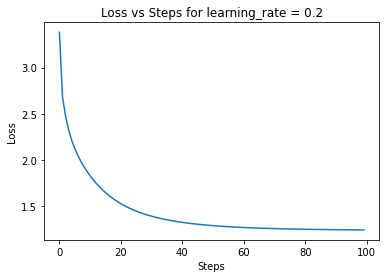


Feature1: sepal length (cm) Feature2: petal width (cm)


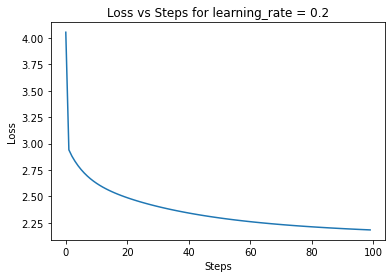


Feature1: sepal width (cm) Feature2: petal length (cm)


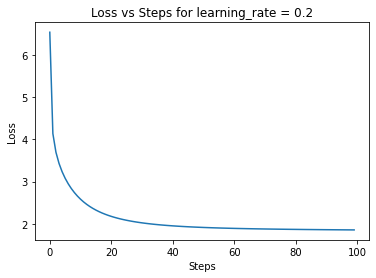


Feature1: sepal width (cm) Feature2: petal width (cm)


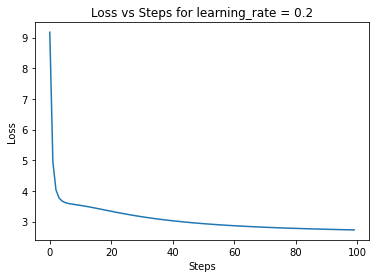


Feature1: petal length (cm) Feature2: petal width (cm)


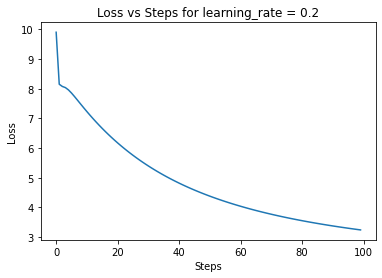

In [8]:
attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
combs = list(combinations(list(range(4)),2))
learning_rate_array = [0.0001, 0.001, 0.01, 0.1]
info = finalize_logistic(attributes, combs)


Feature1: sepal width (cm) Feature2: petal length (cm)


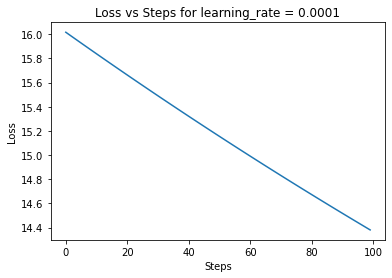

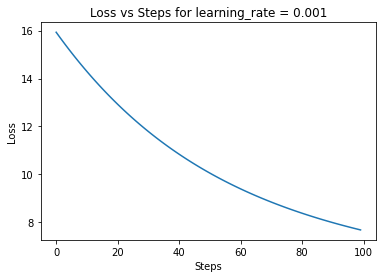

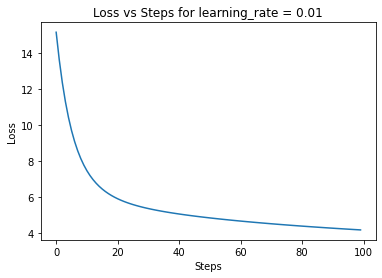

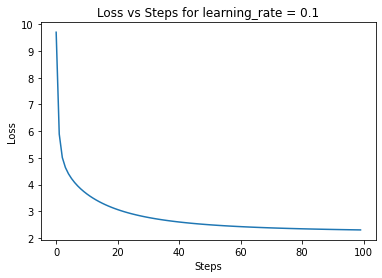

Feature-1          Feature-2  Test mean_sq_err
0  sepal length (cm)   sepal width (cm)          0.266667
1  sepal length (cm)  petal length (cm)          0.266667
2  sepal length (cm)   petal width (cm)          0.333333
3   sepal width (cm)  petal length (cm)          0.200000
4   sepal width (cm)   petal width (cm)          0.333333
5  petal length (cm)   petal width (cm)          0.333333

In [9]:
comb = combs[3]
ft = [comb[0], comb[1]]
print("\nFeature1:", attributes[ft[0]], "Feature2:", attributes[ft[1]])
for learning_rate in learning_rate_array:
    rg, acc = develop_model_logistic(ft, learning_rate=learning_rate)
pd.DataFrame(info, columns=["Feature-1", "Feature-2", "Test mean_sq_err"])

#### Naive bayes

In [10]:
class GaussianNaiveBayes:
    def __init__(self, iter_MAX=100, learning_rate=0.01):
        self.iter_MAX = iter_MAX
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)
        self.iter_MAX = 100

        # calculating the mean, variance and prior P(H) for each class
        for i, c in enumerate(self._classes):
            X_for_class_c = X[y==c]
            self._mean[i, :] = X_for_class_c.mean(axis=0)
            self._var[i, :] = X_for_class_c.var(axis=0)
            self._priors[i] = X_for_class_c.shape[0] / float(n_samples) 
            
    def _calculate_likelihood(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        num = np.exp(- (x-mean)**2 / (2 * var))
        denom = np.sqrt(2 * np.pi * var)
        return num / denom 
    
    def predict(self, X):
        y_pred = [self._classify_sample(x) for x in X]
        
        return np.array(y_pred)

    def _classify_sample(self, x):
        posteriors = []
        # calculating posterior probability for each class
        for i, c in enumerate(self._classes):
            prior = np.log(self._priors[i])
            posterior = np.sum(np.log(self._calculate_likelihood(i, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        # return the class with highest posterior probability
        return self._classes[np.argmax(posteriors)] 
        
        


In [11]:
irisdata = datasets.load_iris()
feature, target = irisdata.data ,irisdata.target
feature_traindata, feature_testdata, target_traindata, target_testdata = train_test_split(feature,target,
                                                                                          test_size=0.1,
                                                                                          random_state=86);

start = time.perf_counter()
nb = GaussianNaiveBayes()
nb.fit(feature_traindata, target_traindata)
predictions = nb.predict(feature_testdata)
end = time.perf_counter()
print(f"Naive Bayes accuracy: {(accuracy_score(target_testdata, predictions))*100}") 
mean_sq_err = mean_squared_error(target_testdata, predictions)
print("Mean Squared Error: ", mean_sq_err)

fp = 0
fn = 0

tp = 0
tn = 0

for actual_value, predicted_value in zip(target_testdata, predictions):
 
    if predicted_value == actual_value: 
        if predicted_value == 1: 
            tp += 1
        else: 
            tn += 1
    else: 
        if predicted_value == 1: 
            fp += 1
        else: 
            fn += 1
            
our_confusion_matrix = [
    [tn, fp],
    [fn, tp]
]


our_confusion_matrix = np.array(our_confusion_matrix)
print("Confusion matrix: ")
print(our_confusion_matrix)

Naive Bayes accuracy: 100.0
Mean Squared Error:  0.0
Confusion matrix: 
[[10  0]
 [ 0  5]]
